In [1]:
import pyco2stats as PyCO2
import numpy as np
import matplotlib.pyplot as plt

# my synthetic sample
my_means = np.array([0.7, 2])
my_stds = np.array([0.6, 0.4])
my_weights = np.array([0.4, 0.6])

my_sample = PyCO2.GMM.sample_from_gmm(n_samples= 100, means=my_means, 
                                     stds=my_stds, weights=my_weights, random_state=42)

# number of components
n_comp = 2

# Fit GMM using EM algorithm
EM_mu, EM_std, EM_w, EM_ll = PyCO2.GMM.gaussian_mixture_em(my_sample, n_comp)

# Fit GMM using EM algorithm implemented using scikit-learn (skEM))
skEM_mu, skEM_std, skEM_w, skEM_ll = PyCO2.GMM.gaussian_mixture_sklearn(my_sample, n_comp)

# Fit GMM using the constrained Gradient Descent (cGD) algorithm
mean_bounds = [(-0.5, 1.5), (1, 3)]
std_bounds = [(0.1, 2.5), (0.1, 2.5)]

cGD_mu, cGD_std, cGD_w = PyCO2.GMM.constrained_gaussian_mixture(my_sample, mean_bounds, 
                                                                 std_bounds, n_comp, verbose=False)


skEM_sample = PyCO2.GMM.sample_from_gmm(n_samples=500, means=skEM_mu, stds=skEM_std, weights=skEM_w, random_state=42)
    

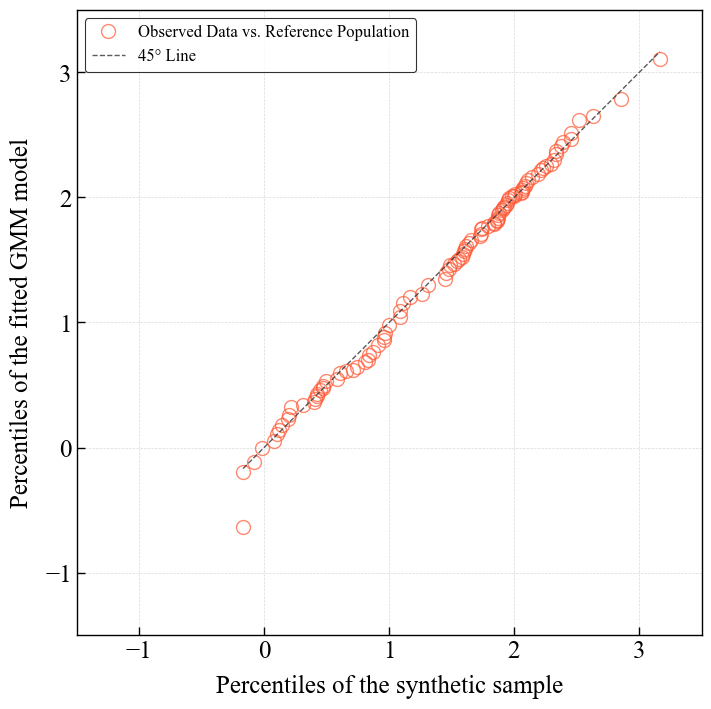

In [2]:
# ── 1) Imports & data as before ─────────────────────────────────────
import numpy as np
import matplotlib.pyplot as plt
import pyco2stats as PyCO2

# … assume my_sample and skEM_sample are already defined …

# ── 2) Global style (same as above) ─────────────────────────────────
plt.rcParams.update({
    'figure.constrained_layout.use': True,
    'font.family':             ['Times New Roman', 'DejaVu Sans'],
    'font.size':               18,
    'axes.linewidth':          1.0,
    'axes.edgecolor':          'black',
    'xtick.direction':         'in',
    'ytick.direction':         'in',
    'xtick.major.size':        6,
    'ytick.major.size':        6,
    'xtick.major.width':       1.0,
    'ytick.major.width':       1.0,
    'grid.color':              'gray',
    'grid.linestyle':          '--',
    'grid.linewidth':          0.5,
    'grid.alpha':              0.3,
})

# ── 3) Create figure & axes ────────────────────────────────────────
fig, ax = plt.subplots(figsize=(7, 7), constrained_layout=True)

# ── 4) Draw Q–Q via new signature: raw_data, model_data, ax, then 
#      marker_kwargs=... and line_kwargs=... ─────────────────────────
PyCO2.Visualize_Mpl.qq_plot(
    my_sample, 
    skEM_sample, 
    ax,
    line_kwargs={
        'linestyle':'--',
        'color':'#333333',
        'linewidth':1.0,
        'alpha':0.8
    },
    marker_kwargs={
        'marker':           'o',
        'markersize':       10,
        'markeredgecolor':  '#FF5733',
        'markerfacecolor':  'none',
        'alpha':            0.7,
    }
)

# ── 5) Axes limits, aspect, labels ─────────────────────────────────
ax.set_xlim(-1.5, 3.5)
ax.set_ylim(-1.5, 3.5)
ax.set_aspect('equal', adjustable='box')

ax.set_xlabel('Percentiles of the synthetic sample', fontsize=18, labelpad=8)
ax.set_ylabel('Percentiles of the fitted GMM model', fontsize=18, labelpad=8)

# ── 6) Grid ───────────────────────────────────────────────
ax.grid(True)

# ── 7) Legend ─────────────────────────────────────────────────────
leg = ax.legend(loc='upper left',
                frameon=True, framealpha=0.8,
                edgecolor='black', fontsize=12)
leg.get_frame().set_linewidth(0.8)

# ── 8) Save & show ─────────────────────────────────────────────────
plt.savefig("qq_plot_Visualize_Mpl.png", dpi=300, bbox_inches='tight')
plt.show()


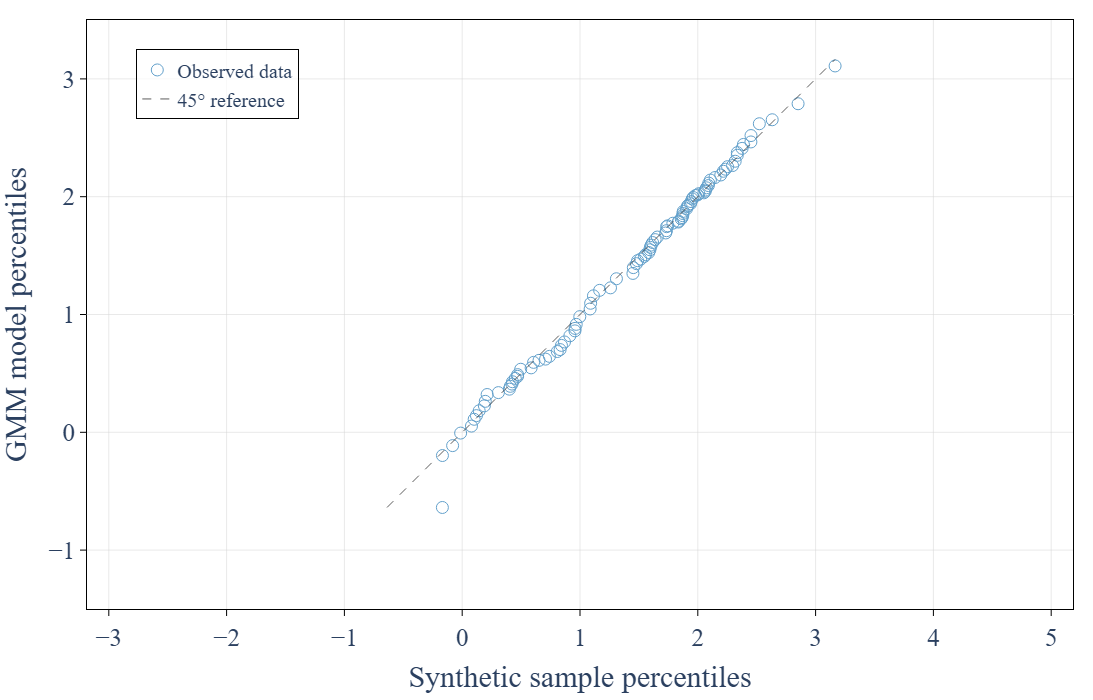

In [3]:
import numpy as np
import pyco2stats as PyCO2
import plotly.graph_objects as go
import plotly.io as pio

# ── 1) Build empty figure ─────────────────────────────────────────────
fig = go.Figure()

# ── 2) Draw the Q–Q plot ───────────────────────────────────────────────
PyCO2.Visualize_Plotly.qq_plot(
    fig=fig,
    raw_data   = my_sample.flatten(),
    model_data = skEM_sample.flatten(),

    # marker_kwargs can accept any go.Scatter kwargs; here we pull out marker independently:
    marker_kwargs = {
        'marker': {'size': 12, 'color': '#1f77b4', 'symbol': 'circle-open'},
        'opacity': 0.7
    },

    # line_kwargs similarly controls the 45° line:
    line_kwargs = {
        'line': {'dash': 'dash', 'color': '#333333', 'width': 1},
        'opacity': 0.8
    }
)

# ── 3) Style the axes ─────────────────────────────────────────────────
AX_RANGE = [-1.5, 3.5]

fig.update_xaxes(
    title_text    = "Synthetic sample percentiles",
    title_font    = dict(size=30),
    tickfont      = dict(size=25),
    range         = AX_RANGE,
    scaleanchor   = "y",     # lock x/y ratio
    scaleratio    = 1,
    showgrid      = True,
    gridcolor     = "lightgray",
    gridwidth     = 0.5,
    zeroline      = False,
    mirror        = True,
    showline      = True,
    linecolor     = "black",
    linewidth     = 1,
    ticks         = "outside",
    ticklen       = 6,
    tickcolor     = "black"
)

fig.update_yaxes(
    title_text    = "GMM model percentiles",
    title_font    = dict(size=30),
    tickfont      = dict(size=25),
    range         = AX_RANGE,
    showgrid      = True,
    gridcolor     = "lightgray",
    gridwidth     = 0.5,
    zeroline      = False,
    mirror        = True,
    showline      = True,
    linecolor     = "black",
    linewidth     = 1,
    ticks         = "outside",
    ticklen       = 6,
    tickcolor     = "black"
)

# ── 4) Legend & layout tweaks ─────────────────────────────────────────
# Rename the two traces for clarity, leave only those two in the legend
fig.data[0].name = "Observed data"
fig.data[1].name = "45° reference"
fig.data[0].showlegend = True
fig.data[1].showlegend = True

fig.update_layout(
    width        = 700,
    height       = 700,
    template     = "plotly_white",
    font_family  = "Times New Roman",
    font_size    = 22,
    margin       = dict(l=60, r=20, t=20, b=60),
    legend       = dict(
        x      = 0.05,
        y      = 0.95,
        bgcolor= "rgba(255,255,255,0.7)",
        bordercolor="black",
        borderwidth=1,
        font   = dict(size=20)
    )
)

# ── 5) Show inline ────────────────────────────────────────────────────
fig.show()
pio.write_image(fig, "Visualize_Sinclair_Plotly.png", width=900, height=900, scale=2)